<img src ='https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# EDA on NYC's Flight Data



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbEZ6DvJA7Yjzb1orOR3hIPdPRCrjoZpP_YPk8OAoHLRk45e4&s" align='center' width=800px><br/>


## Table of Contents

1. [Problem Statement](#section1)
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Flights Frequency**](#section501)<br>
    - 5.1.1 [Top 15 Carriers based on Flight Frequency](#section50101)<br>
    - 5.1.2 [Airport’s flight contribution in %](#section50102)<br>
    - 5.1.3 [Top 10 Destinations](#section50103)<br>
    - 5.1.4 [Flights frequency across months](#section50104)<br>
    - 5.1.5 [Flights frequency across Weekdays](#section50105)<br>
  - 5.2 [Departure and Arrival status**](#section502)<br>
      - 5.2.1 [Overall Departure and Arrival status](#section50201)<br>
      - 5.2.2[Departure and Arrival Status w.r.t. Airports  ](#section50202)<br>
  - 5.3 [Delayed Flights**](#section503)<br>
      - 5.3.1 [Airport wise departure and arrival delays](#section50301)<br>
      - 5.3.2 [Best and worst carrier in terms of departure delay %](#section50302)<br>
      - 5.3.3 [Route with most number of delay from each origin](#section50303)<br> 
      - 5.3.4 [Departure delay across months](#section50304)<br> 
 - 5.4 [Cancelled Flights**](#section504)<br>
     - 5.4.1 [Best and worst airport w.r.t flight cancellation](#section50401)<br>
     - 5.4.2 [Best and worst carrier in terms of cancellation %](#section50402)<br>
     - 5.4.3 [Flight cancellation across months %](#section50403)<br>
     - 5.4.4 [Total Flight , Delays and cancellations w.r.t. months](#section50404)<br>
 - 5.5 [Flight speed & Distance **](#section505)<br>
    - 5.5.1 [Maximum and Minimum Speed](#section50501)<br>
    - 5.5.2 [Speed & Average distance Analysis](#section50502)<br>
 - 5.6 [No. of aircrafts and Avg. distance by carriers **](#section506)<br>
 6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

**NYC** represents the New York City area, including flights to **John F Kennedy International Airport IATA: JFK**, **Newark Liberty International Airport IATA: EWR** and **LaGuardia Airport IATA: LGA.**,
With the given Data we have found below problem statements which we would like to analyse and suggest actionable insights.
1. Flight Delay- Which are the months , Days and Time  where Passengers have to suffer frequent delays and cancellation?
2. Analysis of Carrier and Aircraft  - No. of flights , No. of Aircrafts , Distance covered , Speed analysis. 
3. Peak Season - Month , Days and Time

<img src = 'https://miro.medium.com/max/1000/1*4vxch-2uej3NnVELw-SzUw.jpeg'>

<a id=section2></a>
## 2. Importing Packages

In [1]:
# Load all the packages that will be needed during this project:

import pandas as pd
#pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
import numpy as np
import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.
import calendar as cal

e:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cm
from matplotlib.colors import Normalize


import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

<a id=section3></a>
## 3. Loading Data

In this **Data Visualization** sheet we are using NYC FLight datasets about **Kennedy International Airport (JFK), Newark Liberty International Airport (EWR) and LaGuardia Airport (LGA)**. 

<img src="https://www.newyork-advisor.com/images/New_York_Airports_Map.jpg" width=750 height=750><br/>

In [3]:
# Importing Flight Dataset

DF_flightdata=pd.read_csv("NYC_Flight_Data.csv")
DF_flightdata.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,Unnamed: 19
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,3 Hrs 47 mins
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,NaN
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,NaN
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,NaN


<a id=section301></a>
### 3.1 Description of the Dataset

-  This contains the details of all the flights that occured in 2013. Following is the informations concerning the types of the variables in the dataframe and the quantity of null values for each variable.

-  Each entry of the NYCflights.csv file corresponds to a flight and we see that 3,36,776 flights have been recorded in 2013. These flights are described according to 19 variables. A description of these variables can be found here:

#### This dataset is composed by the following variables:

1.	**year**            2013
2.	**month**           1-12
3.	**day**				Day of month(1-31)
4.	**dep_time**		Departure times, local timezone
5.	**sched_dep_time**	Scheduled departure time
6.	**dep_delay**		Departure delay, in minutes, Negative times represent early departures
7.	**arr_time**		Arrival times, local timezone
8.	**sched_arr_time**	Scheduled arrival time
9.	**arr_delay**		Arrival delay, in minutes, Negative times represent early arrivals
10.	**carrier**			Two letter carrier abbreviation
11.	**flight**			Flight number
12.	**tailnum**			Plane tail number
13.	**origin**			Airport codes for origin
14.	**dest**			Airport codes for destination
15.	**air_time**		Amount of time spent in the air, in minutes
16.	**distance**		Distance flown, in miles
17.	**hour**			Time of departure broken in to hour
18.	**minute**			Time of departure broken in to minutes
19.	**time_hour**		Timestamp


In [91]:
DF_flightdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [14]:
# Importing the flight dataset.

#DF_flightdata = pd.read_csv('NYC_Flight_Data.csv', low_memory=False)
print('Dataframe dimensions:', DF_flightdata.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(DF_flightdata.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(DF_flightdata.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(DF_flightdata.isnull().sum()/DF_flightdata.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (336776, 19)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
column type,int64,int64,int64,float64,int64,float64,float64,int64,float64,object,int64,object,object,object,float64,int64,int64,int64,object
null values (nb),0,0,0,8255,0,8255,8713,0,9430,0,0,2512,0,0,9430,0,0,0,0
null values (%),0,0,0,2.45118,0,2.45118,2.58718,0,2.80008,0,0,0.745896,0,0,2.80008,0,0,0,0


- There are **8255 Null values for dep_time , dep_delay** which can be considered as **cancelled flight** . Out of 8255 flights **2512 not assigned the aircraft unique number **tailnum**. We have another 175 flights for which air_time is not available which we have ignored in the study as these are negligible and will not make any impact on the study. 

In [52]:
DF_flightdata.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


- ```describe``` function gives us the following insights into the data:
  
    - The distribution of **arr_delay** is **positive (right) skewed** because the **mean** of **arr_delay(6.895377)** lies to the **right** of the **median(50%)** value **(-5.00)**, on a **distribution plot** i.e. number of flights early arrival are much higher than no. of delys.
    
  - The **max** value of **dep_delay is 1301 minutes** and **-43 minutes** is the min value which is early departure are not **outliers** as these values are quite possible for long distance routes as analysed in the data so we have included in the study
  
  - Average distance for the flight is **1039 Kms** is negative skewed because the median is **872 Kms** 
 

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [6]:
import pandas_profiling 
airline_data=DF_flightdata.profile_report(title='Pandas Profiling before Data Preprocessing')

print(DF_flightdata.head)
airline_data.to_file(output_file="NYCflight_preprocess_profiling.html")


<bound method NDFrame.head of         year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013  1      1    517.0     515             2.0        830.0      
1       2013  1      1    533.0     529             4.0        850.0      
2       2013  1      1    542.0     540             2.0        923.0      
3       2013  1      1    544.0     545            -1.0        1004.0     
4       2013  1      1    554.0     600            -6.0        812.0      
...      ... ..     ..      ...     ...             ...          ...      
336771  2013  9      30  NaN        1455           NaN        NaN         
336772  2013  9      30  NaN        2200           NaN        NaN         
336773  2013  9      30  NaN        1210           NaN        NaN         
336774  2013  9      30  NaN        1159           NaN        NaN         
336775  2013  9      30  NaN        840            NaN        NaN         

        sched_arr_time  arr_delay carrier  flight tailnum origin dest

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Understanding and cleaning the data

The flight data contains some missing and wrong-formatted data which has to be cleaned up first.<br><br>Generally, we're looking to answer the following questions:<br>
**Is there anything wrong with the data?**<br>
**Are there any quirks with the data?**<br>
**Do we need to fix or remove any of the data?**<br><br>

- Dates and times : In the initial dataframe, dates are coded according to 3 variables: year, month, and day. Convert the dates in date format:a
- Status : Adding status column to check whether the flight is delayed/cancelled/ontime.

In [4]:
# make a copy of dataset
DF_flightdata_update=DF_flightdata.copy()

In [5]:

#Cleaning and formatting time columns
DF_flightdata_update['dep_time'] = DF_flightdata_update.dep_time[~DF_flightdata_update.dep_time.isna()].astype(np.int64).apply('{:0>4}'.format)
DF_flightdata_update['dep_time'] = pd.to_timedelta(DF_flightdata_update.dep_time.str[:2]+':'+DF_flightdata_update.dep_time.str[2:]+':00')

DF_flightdata_update['sched_dep_time'] = DF_flightdata_update.sched_dep_time[~DF_flightdata_update.sched_dep_time.isna()].astype(np.int64).apply('{:0>4}'.format)
DF_flightdata_update['sched_dep_time'] = pd.to_timedelta(DF_flightdata_update.sched_dep_time.str[:2]+':'+DF_flightdata_update.sched_dep_time.str[2:]+':00')

DF_flightdata_update['arr_time'] = DF_flightdata_update.arr_time[~DF_flightdata_update.arr_time.isna()].astype(np.int64).apply('{:0>4}'.format)
DF_flightdata_update['arr_time'] = pd.to_timedelta(DF_flightdata_update.arr_time.str[:2]+':'+DF_flightdata_update.arr_time.str[2:]+':00')

DF_flightdata_update['sched_arr_time'] = DF_flightdata_update.sched_arr_time[~DF_flightdata_update.sched_arr_time.isna()].astype(np.int64).apply('{:0>4}'.format)
DF_flightdata_update['sched_arr_time'] = pd.to_timedelta(DF_flightdata_update.sched_arr_time.str[:2]+':'+DF_flightdata_update.sched_arr_time.str[2:]+':00')

DF_flightdata_update[['dep_time','sched_dep_time', 'arr_time', 'sched_arr_time']] = DF_flightdata_update[['dep_time','sched_dep_time', 'arr_time', 'sched_arr_time']].apply(lambda x: pd.to_timedelta(x))

#We have 458 flights where flight dep_time is present but arr_time, arr_delay and air_time is missing, 
#So we can replace arr_time and arr_delay 

#Add minutes
def addMinutes(time, mins):
    return (pd.to_timedelta(time) + pd.Timedelta(minutes=mins))

#Replace arr_time with sched_arr_time + dep_delay
mask = (~DF_flightdata_update.dep_time.isna() & DF_flightdata_update.arr_time.isna())
DF_flightdata_update.loc[mask, "arr_time"] = DF_flightdata_update[mask].apply(lambda row: addMinutes(row['sched_arr_time'], row['dep_delay']), axis=1)

#Using proper data types
#df[['dep_time','sched_dep_time', 'arr_time', 'sched_arr_time']] = df[['dep_time','sched_dep_time', 'arr_time', 'sched_arr_time']].apply(lambda x: pd.to_timedelta(x))

#Replace arr_delay with arr_time - sched_arr_time
arr_delay_mask = (DF_flightdata_update.arr_time.notna() & DF_flightdata_update.arr_delay.isna())
DF_flightdata_update.loc[arr_delay_mask, "arr_delay"] = ((DF_flightdata_update.loc[arr_delay_mask, "arr_time"] - DF_flightdata_update.loc[arr_delay_mask, "sched_arr_time"]).astype('timedelta64[s]')//60)

#Arrival delay threshold is -100 mins
#arr_delay_thresh_mask = (df.arr_delay.notna() & (df.arr_delay < -100))
#df.loc[arr_delay_thresh_mask, "arr_delay"] = (1440 + df.loc[arr_delay_thresh_mask, "arr_delay"])

#Replace add missing air_time
air_time_mask = (DF_flightdata_update.dep_time.notna() & DF_flightdata_update.arr_time.notna() & DF_flightdata_update.air_time.isna())
DF_flightdata_update.loc[air_time_mask, "air_time"] = abs((DF_flightdata_update.loc[air_time_mask, "arr_time"] - DF_flightdata_update.loc[air_time_mask, "dep_time"]).astype('timedelta64[s]')//60)


In [ ]:
#Dropping unwanted columns
#DF_flightdata_update.drop("year", 1, inplace=True)
#DF_flightdata_update.drop("hour", 1, inplace=True)
#DF_flightdata_update.drop("minute", 1, inplace=True)
#DF_flightdata_update.drop("time_hour", 1, inplace=True)


In [6]:
# Create status with Ontime, Late and Cancelled & Early Departures for both departure and arrival
DF_flightdata_update.loc[DF_flightdata_update.dep_delay.isna(), "dep_status"]="Cancelled"
DF_flightdata_update.loc[DF_flightdata_update.dep_delay < 0, "dep_status"]="EarlyDeparture"
DF_flightdata_update.loc[DF_flightdata_update.dep_delay == 0, "dep_status"]="OnTime"
DF_flightdata_update.loc[DF_flightdata_update.dep_delay > 0, "dep_status"]="Late"

DF_flightdata_update.loc[DF_flightdata_update.arr_delay.isna(), "arr_status"]="Cancelled"
DF_flightdata_update.loc[DF_flightdata_update.arr_delay < 0, "arr_status"]="EarlyArrival"
DF_flightdata_update.loc[DF_flightdata_update.arr_delay == 0, "arr_status"]="OnTime"
DF_flightdata_update.loc[DF_flightdata_update.arr_delay > 0, "arr_status"]="Late"


In [13]:
# adding date column while merging year,month and day in date formaairline_data_status_update['date'] = pd.to_datetime(airline_data_status_update[['year','month','day']], yearfirst=True)

DF_flightdata_update['date'] = pd.to_datetime(DF_flightdata_update[['year','month','day']], yearfirst=True)
DF_flightdata_update['month_name'] = DF_flightdata_update['month'].apply(lambda x: cal.month_abbr[x])
DF_flightdata_update['week_day']=DF_flightdata_update['date'].apply(lambda x: x.strftime('%a'))
DF_flightdata_update['weekday'] = DF_flightdata_update['date'].apply(lambda x: x.weekday())


In [ ]:
#### Export dataframe to excel

#DF_flightdata_update[['dep_time', 'sched_dep_time','status']] 
#DF_flightdata_update.to_excel (r'aaj_postprofiling_dataframe.xlsx', index = False, header=True)

<a id=section402></a>
###  4.2 Pandas Profiling

Generates profile reports from a pandas DataFrame.<br><br>For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:<br>
**Essentials:** type, unique values, missing values <br>
**Quantile statistics:** like minimum value, Q1, median, Q3, maximum, range, interquartile range <br>
**Descriptive statistics:** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness <br>
**Correlations:** highlighting of highly correlated variables, Spearman and Pearson matrixes <br>
**Most frequent values** <br>
**Histogram**<br><br>

<a id=section5></a>
## 5. EDA
<br>Data cleaning step is completed now we can start analyzing the data.<br>Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. This is the stage where we plot all the data in as many ways as possible.<br><br>

In [7]:
DF_flightdata_update.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521,336776,328521.000000,328521,336776,328521.000000,336776.000000,328521.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,0 days 13:42:10.090131,0 days 13:37:02.696629,12.639070,0 days 15:13:12.569607,0 days 15:33:26.591621,6.926373,1971.923620,151.225736,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,0 days 04:52:43.859391,0 days 04:41:08.833305,40.210061,0 days 05:20:10.560649,0 days 04:58:58.522489,49.635293,1632.471938,95.297581,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,0 days 00:01:00,0 days 01:06:00,-43.000000,0 days 00:01:00,0 days 00:01:00,-1348.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,0 days 09:07:00,0 days 09:06:00,-5.000000,0 days 11:05:00,0 days 11:24:00,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,0 days 14:01:00,0 days 13:59:00,-2.000000,0 days 15:36:00,0 days 15:56:00,-5.000000,1496.000000,130.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,0 days 17:44:00,0 days 17:29:00,11.000000,0 days 19:41:00,0 days 19:45:00,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,1 days 00:00:00,0 days 23:59:00,1301.000000,1 days 02:29:00,0 days 23:59:00,1272.000000,8500.000000,1289.000000,4983.000000,23.000000,59.000000


## Correlation plot to see how related one feature is to the next. 

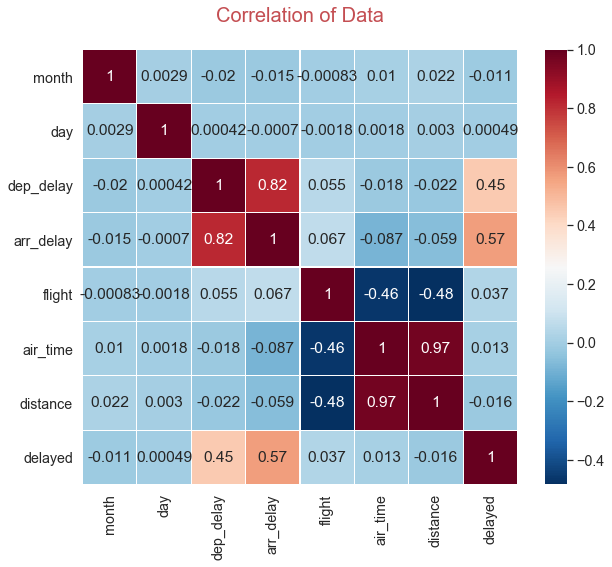

In [54]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Data', y=1.05, size=20, color='R')
sns.heatmap(DF_flightdata_update.corr(),linewidths=0.1,vmax=1.0,square=True, cmap=plt.cm.RdBu_r, linecolor='white', annot=True)
plt.show()

<a id=section501></a>
## 5.1 Flights Frequency


<a id=section50101></a>
## 5.1.1 Top 15 Carriers with No. of flights


Text(0.5, 0, 'Carrier')

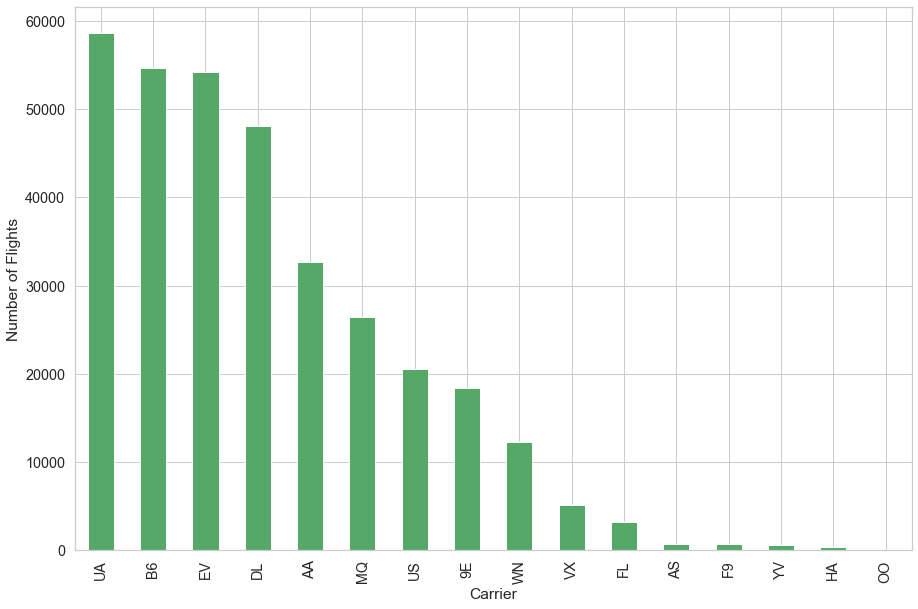

In [8]:
#Graphical representation of carriers scheduled flights in numbers
import numpy as np
plt.figure(figsize = (15, 10))
DF_flightdata_update['carrier'].value_counts().plot(kind='bar', color='g')
plt.ylabel('Number of Flights')
plt.xlabel('Carrier')

- Top 3 Carriers UA,B6 & EV out of total 16 contributes more than 50% flights.

<a id=section50102></a>
## 5.1.2 Airport’s flight contribution in %

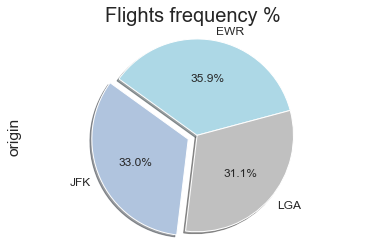

In [99]:
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
DF_flightdata_update.groupby(['origin']).agg({'origin':'count'}).plot(fontsize=12,legend=False,kind='pie',colors=my_colors,explode=my_explode, autopct='%3.1f%%', subplots=True, shadow = True,startangle=15)
plt.title('Flights frequency %', fontsize=20)
plt.axis('equal')
plt.figsize=(120,20)
plt.show()

- NYC – 3 Airports have managed 328521 flights in 2013  
- EWR has managed 35.9% flights followed by JFK (33%) and LGA (31.1%)


<a id=section50103></a>
## 5.1.3  Top 10 Destinations

Text(0.5, 1.0, '')

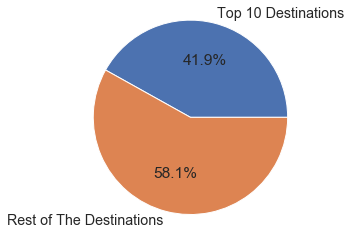

In [105]:
top_dest= (total_top_dest.head(10))
total_dest=DF_flightdata_update['dest'].value_counts().sort_values(ascending=False)
top_dest=total_dest.head(10)
rest_dest= (total_dest[10:])
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Top 10 Destinations', 'Rest of The Destinations']
sizes = [top_dest.sum(), rest_dest.sum()]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('')


- Out of total 105 destinations Top 10 contributes close to 42% of total number of flights 

The total number of destination flight from NYC is:: 105




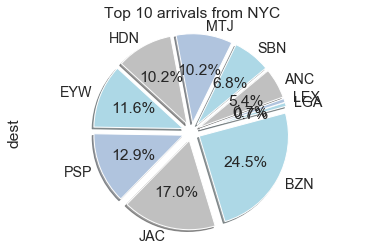

In [31]:
#max_dest_count=dest_count.sort_values(['month'], ascending=False).head(10)
#print(DF_flightdata_final['dest'].value_counts()).head(10).sort_values(ascending=False).plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)   
allflight_NYC=DF_flightdata_update['dest'].unique()    
allflightcount_NYC=len(allflight_NYC)      # Total number of destination is 104
print("The total number of destination flight from NYC is"+ "::" ,allflightcount_NYC)
print('\n')

DF_flightdata_update['dest'].value_counts()
new_data=(DF_flightdata_update['dest'].value_counts().sort_values(ascending=True))
space = np.ones(10)/10
my_colors = ['lightblue','lightsteelblue','silver']
new_data.head(10).plot(kind='pie',colors=my_colors,explode=space,y='month',autopct='%3.1f%%', subplots=True, shadow = True,startangle=15)

#DF_flightdata_final.groupby(['origin']).agg({'month':'count'}).plot(kind='pie',colors=my_colors,explode=my_explode, y='month',autopct='%3.1f%%', subplots=True, shadow = True,startangle=15)
plt.title('Top 10 arrivals from NYC')
plt.axis('equal')
plt.show()

- List of Top 10 Destinations

 <a id=section50104></a>
## 5.1.4 Flights frequency across months  

Text(0.5, 1.0, 'Area chart showing the Flights Frequency according to months')

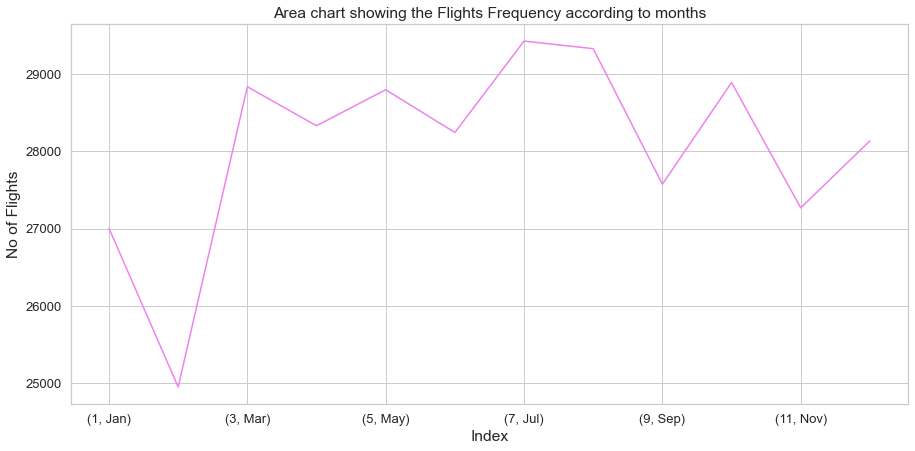

In [27]:
DF_flightdata_update.groupby(['month','month_name'])['month'].count().plot(kind='line', figsize=(15,7), color='violet', fontsize=13)
                                                                    
plt.xlabel('Index')
plt.ylabel('No of Flights')
plt.title('Area chart showing the Flights Frequency according to months')

- Average flights PM are between 27 K to 28 K flights.
- July & August are the high season months with above 29 K flights.
- Feb has the least frequency with 25 K flights in a month.

 <a id=section50105></a>
## 5.1.5 Flights frequency across WeekDays  

Text(0.5, 1.0, 'Area chart showing the Flights Frequency according to Week Days')

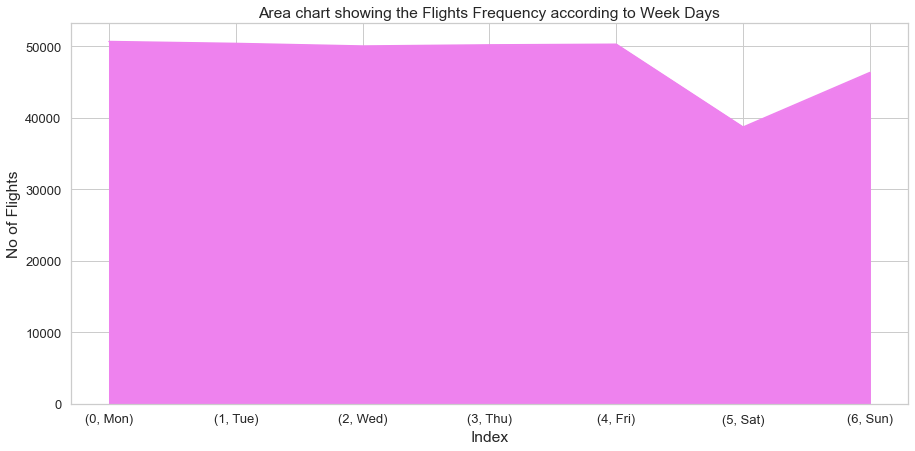

In [31]:
DF_flightdata_update.groupby(['weekday','week_day'])['weekday'].count().plot(kind='area', figsize=(15,7), color='violet', fontsize=13)
                                                                    
plt.xlabel('Index')
plt.ylabel('No of Flights')
plt.title('Area chart showing the Flights Frequency according to Week Days')

In [15]:
DF_flightdata_update.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,Unnamed: 19,dep_status,arr_status,date,month_name,week_day,weekday
0,2013,1,1,05:17:00,05:15:00,2.0,08:30:00,08:19:00,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,3 Hrs 47 mins,Late,Late,2013-01-01,Jan,Tue,1
1,2013,1,1,05:33:00,05:29:00,4.0,08:50:00,08:30:00,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,NaN,Late,Late,2013-01-01,Jan,Tue,1
2,2013,1,1,05:42:00,05:40:00,2.0,09:23:00,08:50:00,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,NaN,Late,Late,2013-01-01,Jan,Tue,1
3,2013,1,1,05:44:00,05:45:00,-1.0,10:04:00,10:22:00,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,NaN,EarlyDeparture,EarlyArrival,2013-01-01,Jan,Tue,1
4,2013,1,1,05:54:00,06:00:00,-6.0,08:12:00,08:37:00,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,NaN,EarlyDeparture,EarlyArrival,2013-01-01,Jan,Tue,1
5,2013,1,1,05:54:00,05:58:00,-4.0,07:40:00,07:28:00,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2013 5:00,NaN,EarlyDeparture,Late,2013-01-01,Jan,Tue,1
6,2013,1,1,05:55:00,06:00:00,-5.0,09:13:00,08:54:00,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2013 6:00,NaN,EarlyDeparture,Late,2013-01-01,Jan,Tue,1
7,2013,1,1,05:57:00,06:00:00,-3.0,07:09:00,07:23:00,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,1/1/2013 6:00,NaN,EarlyDeparture,EarlyArrival,2013-01-01,Jan,Tue,1
8,2013,1,1,05:57:00,06:00:00,-3.0,08:38:00,08:46:00,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2013 6:00,NaN,EarlyDeparture,EarlyArrival,2013-01-01,Jan,Tue,1
9,2013,1,1,05:58:00,06:00:00,-2.0,07:53:00,07:45:00,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,1/1/2013 6:00,NaN,EarlyDeparture,Late,2013-01-01,Jan,Tue,1


<a id=section502></a>
## 5.2 Departure and Arrival status

 <a id=section50201></a>
## 5.2.1 Overall Departure and Arrival Status  

In [115]:
depStatus = DF_flightdata_update.groupby('dep_status')['dep_status'].count()
arrStatus = DF_flightdata_update.groupby('arr_status')['arr_status'].count()
depStatus
arrStatus

arr_status
Cancelled       8255  
EarlyArrival    189156
Late            133940
OnTime          5425  
Name: arr_status, dtype: int64

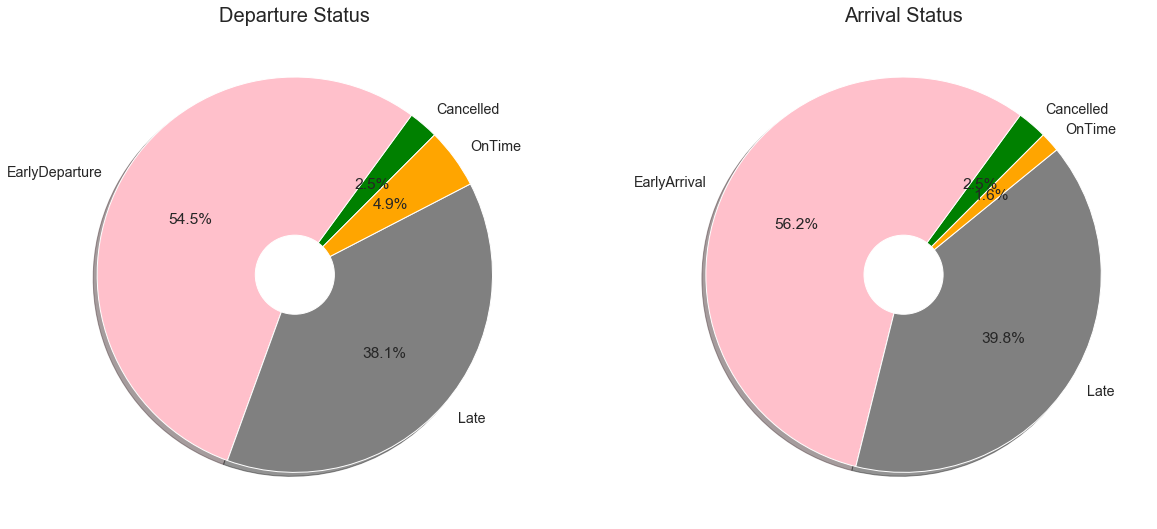

In [116]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(depStatus, labeldistance=1.1, labels=depStatus.index, startangle=45, autopct='%1.1f%%', shadow=True, colors=['green','pink','grey','orange'])
ax.set_title("Departure Status", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.pie(arrStatus, labeldistance=1.1, labels=arrStatus.index, startangle=45, autopct='%1.1f%%', shadow=True, colors=['green','pink','grey','orange'])
ax2.set_title("Arrival Status", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))
plt.show()

- Out of 336776 flights, 200089(59.1%) flights in 2013 were departed on time,128432(38.1%) were delayed and just 8255(2.5%) of flights were canceled.

 <a id=section50202></a>
## 5.2.2  Departure and Arrival Status w.r.t. Airports  

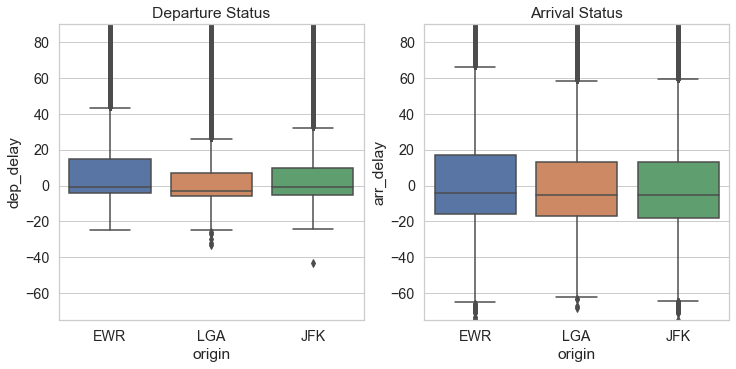

In [221]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(221)

minValue = DF_flightdata_update['arr_delay'].min()
maxValue = DF_flightdata_update['arr_delay'].max()
plt.ylim(minValue,maxValue)

sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
plt.ylim(-75,90)
plt.title('Departure Status')
ax2 = sns.boxplot(x="origin", y="dep_delay", data=DF_flightdata_update)

ax2 = fig.add_subplot(222)


plt.title('Arrival Status')
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
plt.ylim(-75,90)
ax = sns.boxplot(x="origin", y="arr_delay", data=DF_flightdata_update)

- 75 to 80 % flights can be on time if Airport manage only short term delays.
- There is huge variance in the flight speed resulted either flights are reach very early or further getting late.


<a id=section503></a>
## 5.3 Delayed Flights

 <a id=section50301></a>
## 5.3.1 Airport wise departure and arrival delays

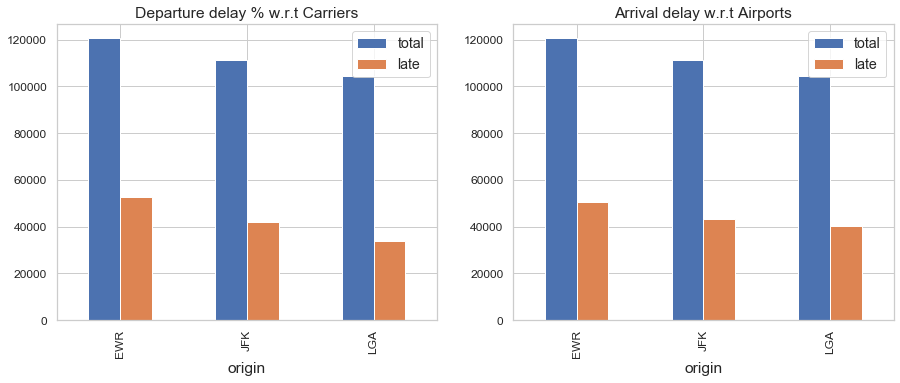

In [171]:
deporiginPer = DF_flightdata_update.groupby('origin')['origin'].count().reset_index(name='total')
delayedFlights = DF_flightdata_update.loc[DF_flightdata_update['dep_status'] == 'Late'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
deporiginPer['late'] = delayedFlights['Late'].values
#depCarrierPer['percentage'] = (depCarrierPer['late']/depCarrierPer['total'])*100
deporiginPer.set_index('origin', inplace=True)
deporiginPer


arrival_originPer = DF_flightdata_update.groupby('origin')['origin'].count().reset_index(name='total')
delayedFlights = DF_flightdata_update.loc[DF_flightdata_update['arr_status'] == 'Late'].groupby(['origin','arr_status'])['arr_status'].count().unstack('arr_status')
arrival_originPer['late'] = delayedFlights['Late'].values
#depCarrierPer['percentage'] = (depCarrierPer['late']/depCarrierPer['total'])*100
arrival_originPer.set_index('origin', inplace=True)
arrival_originPer



fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot(221)
deporiginPer.plot(kind='bar', ax=ax, figsize=[15,12], title ="Departure delay % w.r.t Carriers",  legend=True, fontsize=12)
ax2 = fig.add_subplot(222)
ax.set_facecolor('white')
ax2.set_facecolor('white')
arrival_originPer.plot(kind='bar', ax=ax2,figsize=[15,12], title ="Arrival delay w.r.t Airports",  legend=True, fontsize=12)
plt.show()



- LGA airport is best in terms of departure and arrival delay, where as EWR is worst with 5000+ delayed flights.

In [129]:
df_delay_dep=DF_flightdata_update[DF_flightdata_update['dep_delay']>0]
conditions = [
 
   (df_delay_dep['dep_delay'].isna()) ,
    (df_delay_dep['dep_delay']==0),
    (( (df_delay_dep['dep_delay'] >= 1 ) & (df_delay_dep['dep_delay'] <15))),
    ( ( (df_delay_dep['dep_delay'] >= 15 ) & (df_delay_dep['dep_delay'] <60))),
    ( (df_delay_dep['dep_delay'] >= 60)) 
  ]
choices = ['Cancelled','On Time','Up to 15 mins','15-60 Mins','Above 1 hr']

df_delay_dep['status'] = np.select(conditions, choices)


## Airport wise Time Based Departure Delays


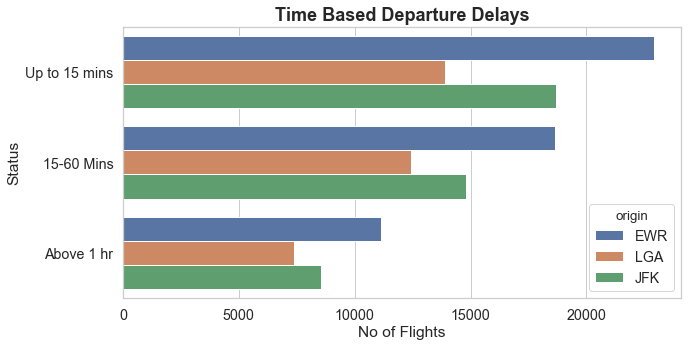

In [131]:
origin_delay_status=df_delay_dep.groupby(['status','origin']).agg({'dep_delay':'count'})
plt.figure(figsize=(10,5))
sns.countplot(y="status", hue="origin", data=df_delay_dep)
plt.title("Time Based Departure Delays",fontsize=18,fontweight="bold")
plt.ylabel("Status")
plt.xlabel("No of Flights")
plt.show()

- Maximum delays are from EWR followed by JFK , LGA is the best Airport for timely departure
- Most of the flights are delayed between 0-15 mins which might be operational delay

 <a id=section50302></a>
## 5.3.2 Best and worst carrier in terms of departure delay %

In [173]:
depCarrierPer = DF_flightdata_update.groupby('carrier')['carrier'].count().reset_index(name='total')
delayedFlights = DF_flightdata_update.loc[DF_flightdata_update['dep_status'] == 'Late'].groupby(['carrier','dep_status'])['dep_status'].count().unstack('dep_status')
depCarrierPer['late'] = delayedFlights['Late'].values
depCarrierPer['percentage'] = (depCarrierPer['late']/depCarrierPer['total'])*100
depCarrierPer.set_index('carrier', inplace=True)
depCarrierPer


,total,late,percentage
carrier,,,
9E,18460,7063,38.261105
AA,32729,10162,31.048917
AS,714,226,31.652661
B6,54635,21445,39.251396
DL,48110,15241,31.679485
EV,54173,23139,42.713160
F9,685,341,49.781022
FL,3260,1654,50.736196
HA,342,69,20.175439


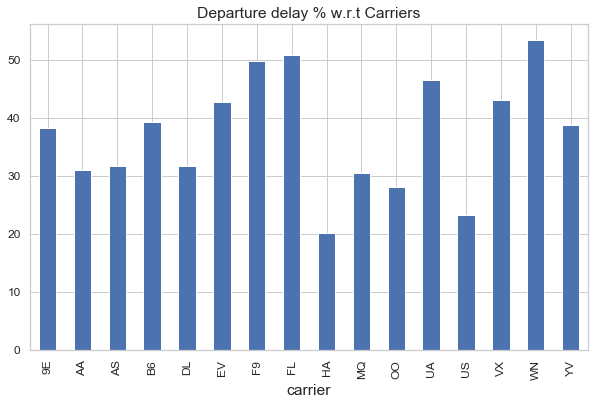

In [226]:

depCarrierPer['percentage'].plot(kind='bar', figsize=[10,6], title ="Departure delay % w.r.t Carriers",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()


- HA carrier is best in terms of departure delay with just 20% of total flight got delayed, On other hand WN performed worst with 53% of delayed flights followed by FL and F9.

<a id=section50303></a>
## 5.3.3 Route with most number of delay from each origin

In [175]:
routeDelay = DF_flightdata_update.loc[DF_flightdata_update['dep_status'] == 'Late'].groupby(['origin','dest','dep_status'])['dep_status'].count().reset_index(name='total')
routeDelay = routeDelay[routeDelay.groupby('origin')['total'].transform(max) == routeDelay['total']].sort_values('total')

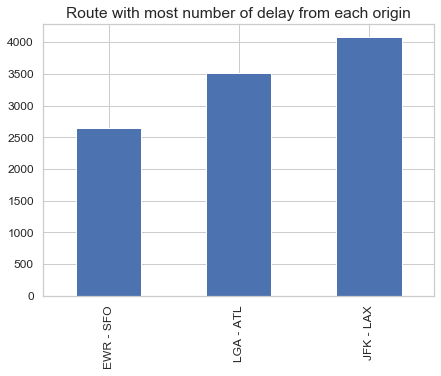

In [176]:
routeDelay.plot(kind='bar', figsize=[7,5], title ="Route with most number of delay from each origin",  legend=False, fontsize=12)
plt.gca().set_xticklabels(routeDelay['origin'].astype(str) + " - "+routeDelay['dest'].astype(str))
plt.gca().set_facecolor('white')
plt.show()

- JFK-LAX route had most number of flight delays.

<a id=section50304></a>
## 5.3.4 Departure delay across months

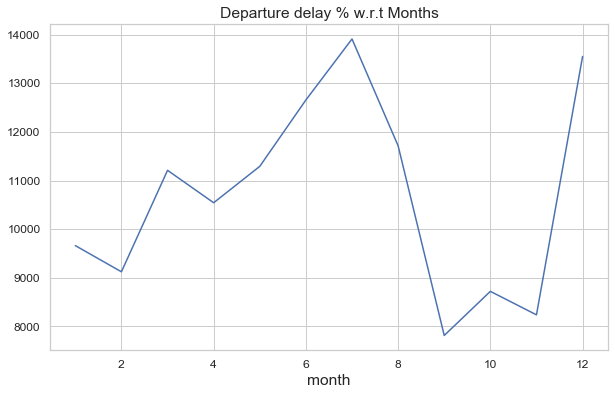

In [178]:
depMonth = DF_flightdata_update.loc[DF_flightdata_update['dep_status'] == 'Late'].groupby(['month','dep_status'])['dep_status'].count().unstack('dep_status')
depMonth
depMonth.plot(figsize=[10,6], title ="Departure delay % w.r.t Months",  legend=False, fontsize=12)
plt.show()

- Flights delay is more in June, July and December months, where as September is best month to travel.

<a id=section50401></a>
## 5.4 Cancelled Flights

<a id=section50401></a>
## 5.4.1 Best and worst airport w.r.t flight cancellation 

In [181]:
cancelAir = DF_flightdata_update.loc[DF_flightdata_update['dep_status'] == 'Cancelled'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
cancelAir

dep_status,Cancelled
origin,
EWR,3239
JFK,1863
LGA,3153


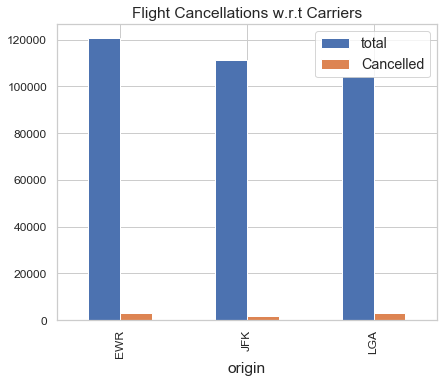

In [212]:
can_originPer = DF_flightdata_update.groupby('origin')['origin'].count().reset_index(name='total')
CancelFlights = DF_flightdata_update.loc[DF_flightdata_update['dep_status'] == 'Cancelled'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
can_originPer['Cancelled'] = CancelFlights['Cancelled'].values
can_originPer.set_index('origin', inplace=True)


fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot(221)
deporiginPer.plot(kind='bar', ax=ax, figsize=[15,12], title ="Flight Cancellations w.r.t Carriers",  legend=True, fontsize=12)
ax.set_facecolor('white')
plt.show()


- 1863 flights got canceled from JFK airport in 2013, which is lowest among all.

<a id=section50402></a>
## 5.4.2 Best and worst airport w.r.t flight cancellation 

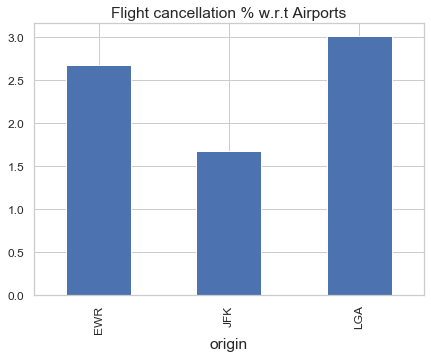

In [211]:
can_originPer
can_originPer['percentage'] = (can_originPer['Cancelled']/can_originPer['total'])*100
can_originPer['percentage'].plot(kind='bar', figsize=[5,5], title ="Flight cancellation % w.r.t Airports",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()


- 3% of total flight got canceled LGA airport, which is highest among all

<a id=section50403></a>
## 5.4.3 Flight cancellation across months 

In [213]:
canMonth = DF_flightdata_update.loc[DF_flightdata_update['dep_status'] == 'Cancelled'].groupby(['month','dep_status'])['dep_status'].count().unstack('dep_status')
canMonth

dep_status,Cancelled
month,
1,521
2,1261
3,861
4,668
5,563
6,1009
7,940
8,486
9,452


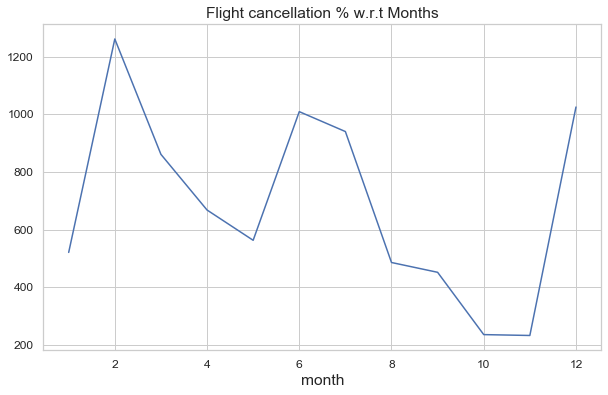

In [214]:
canMonth.plot(figsize=[10,6], title ="Flight cancellation % w.r.t Months",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()

 - Flight cancellation is lowest in October and November months

<a id=section50404></a>
## 5.4.4 Total Flight , Delays and cancellations w.r.t. months 

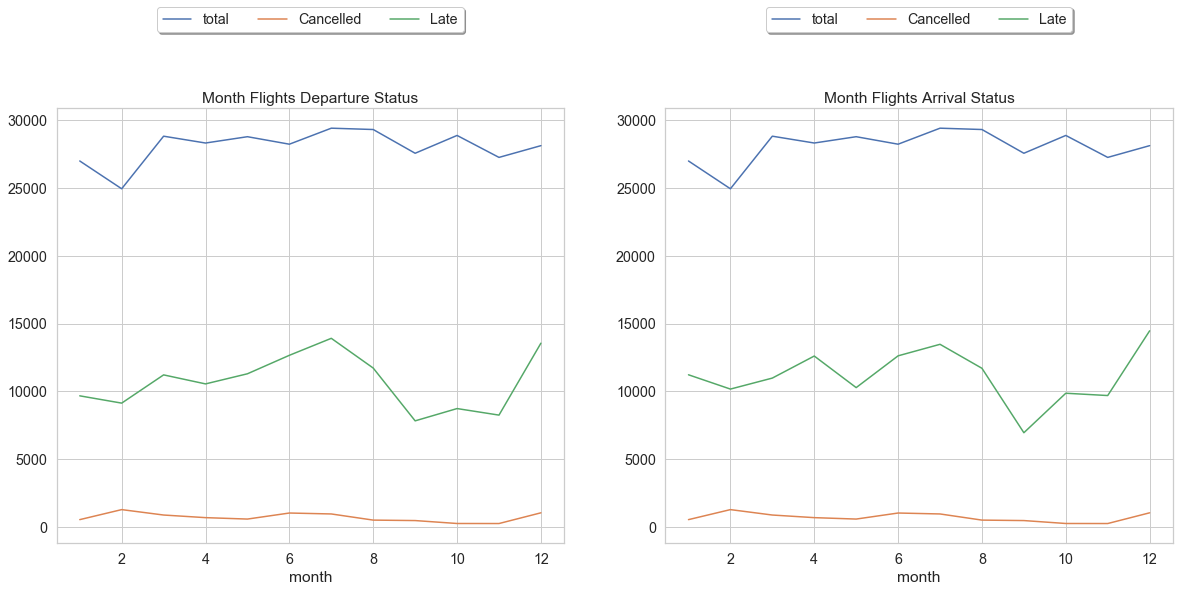

In [219]:
f,ax=plt.subplots(1,2,figsize=(20,8))

filter_data=DF_flightdata_update[(DF_flightdata_update['dep_status'] == 'Late') | (DF_flightdata_update['dep_status'] == 'Cancelled') ]
#df2 = filter_data.groupby(['month','dep_status'])['dep_status'].count().unstack('dep_status').plot()

df2=filter_data.groupby(['month','dep_status'])['dep_status'].count().unstack('dep_status')

total_flights = DF_flightdata_update.groupby('month')['month'].count().reset_index(name='total')
df=pd.merge(total_flights,df2, on=['month'])
df=df.set_index('month')


df2=df.plot(ax=ax[0])

df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
ax[0].set_title('Month Flights Departure Status')


filter_arr_data=DF_flightdata_update[(DF_flightdata_update['arr_status'] == 'Late') | (DF_flightdata_update['arr_status'] == 'Cancelled') ]
df3=filter_arr_data.groupby(['month','arr_status'])['arr_status'].count().unstack('arr_status')
total_filghts_arrival=pd.merge(total_flights,df3, on=['month'])
total_filghts_arrival=total_filghts_arrival.set_index('month')

total_filghts_arrival=total_filghts_arrival.plot(ax=ax[1])
#df_arrival = filter_data_arrival.groupby(['month','dep_status'])['dep_status'].count().unstack('dep_status').plot(ax=ax[1])
total_filghts_arrival.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
ax[1].set_title('Month Flights Arrival Status')
plt.show()



- July & Aug more no. of flights are delayed which could be a seasonal issue
- Sep, Oct & Nov months are the best performing months for timely flights and less no. of cancellations.

 <a id=section505></a>
## 5 Flight speed & Distance 

 <a id=section50501></a>
## 5.5.1 Maximum and Minimum Speed 

In [114]:
DF_flightdata_update['speed'] = DF_flightdata_update['distance']/(DF_flightdata_update['air_time']/60)
print(DF_flightdata_update.iloc[DF_flightdata_update['speed'].idxmax()])
print(DF_flightdata_update.iloc[DF_flightdata_update['speed'].idxmin()])

month             6                  
day               1                  
dep_time          0 days 16:26:00    
sched_dep_time    0 days 16:29:00    
dep_delay        -3                  
arr_time          0 days 18:50:00    
sched_arr_time    0 days 18:53:00    
arr_delay        -3                  
carrier           US                 
flight            17                 
tailnum           N552UW             
origin            JFK                
dest              PHX                
air_time          144                
distance          2153               
date              2013-06-01 00:00:00
month_name        Jun                
week_day          Sat                
dep_status        EarlyDeparture     
arr_status        EarlyArrival       
delayed           False              
total_flights     NaN                
speed             897.083            
Name: 222734, dtype: object
month             1                  
day               13                 
dep_time          0 da

 <a id=section50502></a>
## 5.5.2 Speed and Average Distance Analysis

Text(0.5, 1.0, 'Speed & Distance Analysis')

<Figure size 864x504 with 0 Axes>

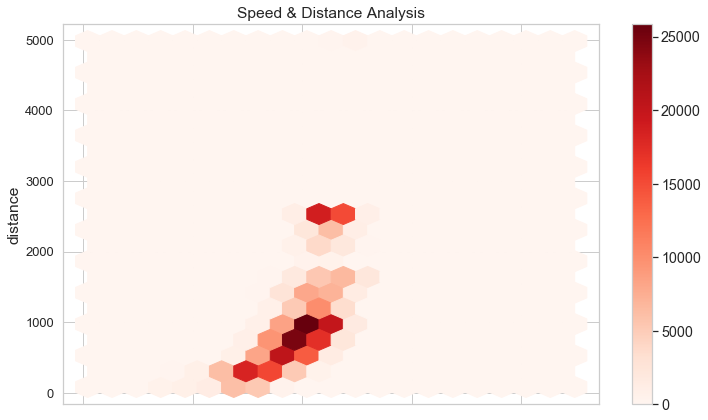

In [109]:
spped_distance=DF_flightdata_update.loc[ : , ['speed', 'distance'] ]

spped_distance=DF_flightdata_update.query('speed.notnull()', engine='python')

spped_distance=spped_distance.loc[ : , ['speed', 'distance'] ]
plt.figure(figsize=(12,7))
spped_distance.plot(kind='hexbin', x='speed', y='distance', figsize=(12, 7), gridsize=20, fontsize=13, colormap='Reds')
plt.title('Speed & Distance Analysis')

(#section50501)<br>
    - 5.5.2 [ Speed & Average distance by No. of flights](#section50502)<br>

- Maximum No. of flights covering distance of 1000 Kms range 
- Speed is direct proportionate to the distance 


 <a id=section506></a>
## 5.6 No. of aircrafts and Avg. distance by carriers

In [117]:
#DF_flightdata_update.groupby(['carrier','delayed']).size().unstack()
#DF_flightdata_update['COUNTER'] =1       #initially, set that counter to 1.

total_tail= DF_flightdata_update.groupby(['carrier'])['tailnum'].count() #sum function
total_tail = DF_flightdata_update.groupby("carrier")

total_tail = total_tail.agg({"tailnum": "nunique"})

total_tail = total_tail.reset_index()

#DF_flightdata_update['distance_total'] = DF_flightdata_update.groupby(['carrier'])['distance'].sum() #sum function

total_dis= DF_flightdata_update.groupby(['carrier']).agg({'distance':'mean'})


carrier_tail=pd.merge(total_tail,total_dis, on=['carrier'])

carrier_tail.sort_values(by=['distance'], ascending=False)
print(carrier_tail)


   carrier  tailnum     distance
0   9E      203      530.235753 
1   AA      600      1340.235999
2   AS      84       2402.000000
3   B6      193      1068.621525
4   DL      629      1236.901206
5   EV      316      562.991730 
6   F9      25       1620.000000
7   FL      129      664.829448 
8   HA      14       4983.000000
9   MQ      237      569.532712 
10  OO      28       500.812500 
11  UA      620      1529.114873
12  US      289      553.456272 
13  VX      53       2499.482177
14  WN      582      996.269084 
15  YV      58       375.033278 


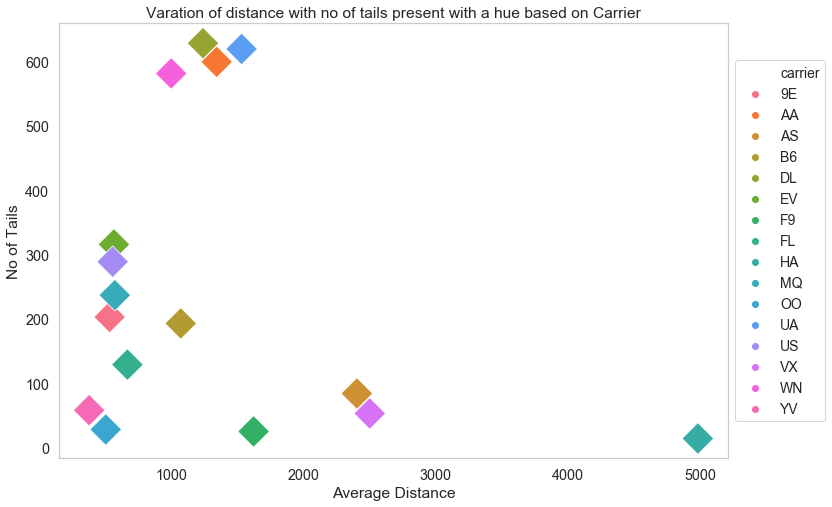

In [118]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=carrier_tail, x='distance', y='tailnum', hue='carrier',s=500,marker="D")

plt.xlabel('Average Distance')
plt.ylabel('No of Tails')
plt.title('Varation of distance with no of tails present with a hue based on Carrier')
plt.grid(False)
plt.legend(fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- VVN, EV, UA , B6  are the largest airlines with 500 + aircrafts .
- MQ , US , 9E , EV  ,YV, OO covers short distance routes with avg. distance around 500 Kms
- HA has least no. of aircrafts with longest distance coverage, other long distance carriers are AS & VX

## Correlation between all Data

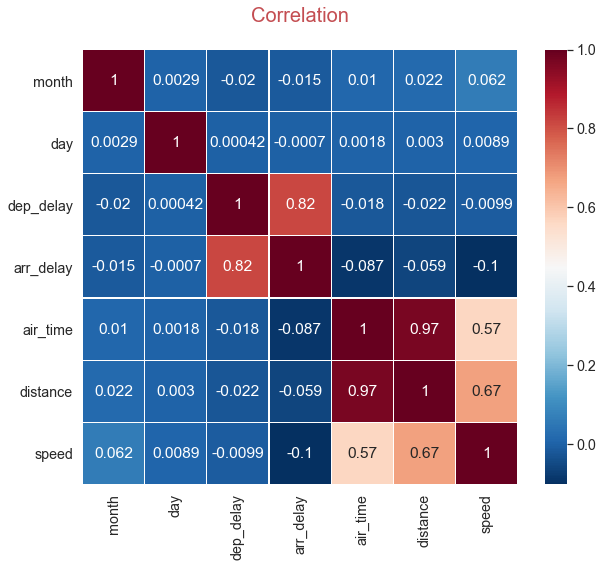

In [142]:
flt_corr= DF_flightdata_update.drop(['dep_time','sched_dep_time','arr_time','sched_arr_time','hour','minute',
                              'time_hour','year','flight'], axis=1)
plt.figure(figsize=(10,8))
plt.title('Correlation', y=1.05, size=20, color='R')
sns.heatmap(flt_corr.corr(),linewidths=0.1,vmax=1.0,square=True, cmap=plt.cm.RdBu_r, linecolor='white', annot=True)
plt.show()

- arr_delay is strongly related to dep_delay
- air_time and distance is also closely related to speed of the flight.
- speed is adversely correlated to arr_delay


<a id=section6></a>
## 6 Conclusion

- Overall 40 % flights are either delayed (38.1% ) or cancelled(2.5%).
- EWR ( Newark ) is the busiest Airport with 35.9% flights has the maximum delays with 44%.
- LGA has the maximum cancellations with 3% followed by 2.7% at EWR.
- Total 16 Carriers and 105 Destinations handles 336776 flighs.
- Top 3 Carriers UA(United Airlines),B6(Jet Blue) & EV have more than 500 aircrafts and 50 K + flights in a year.
- Out of total 105 Total destinations Top 10 contributes close to 42% of total number of flights. 
- July & August are the peak months with maximum delays as well 
- Feb has the least no. of flights with more no. of cancellation which could be due to less passengers.
- Sep, Oct & Nov months are the best performing months for timely flights and less no. of cancellation.
- Out of 38 % delayed flights more than half are less than 15 or 20 mins .
- VVN, FL, F9 , UA , VX , EV  are Top 5 carriers with close to 50 % delay impacting other flight schedules as well.
- Arrival delay is strongly related to Departure delay but variance in the speed and air time further impacts the delay or       early arrival.
- 9E , AA , B6 , DL , EV , MQ have flights from all the three Airports.
- High speed aircraft may compensate short delays upto 15 minutes . 

### In 2013, around 39% of flight got delayed and most of them were in June, July and December months. From flight frequency graph we can see that air traffic is more in these 3 months, So this is on the reason flights got delayed in June, July and December months.

<a id=section601></a>
### 6.1 Actionable Insights

- 0-15 minutes to be addressed first.### Ease down pressure on  Newark  by shifting small carriers to LaGuardia
- Airlines having multiple Airports to  consolidate to 1 or 2. 
- High speed aircrafts to be used in peak season . 
- Stringent Clause for Airlines and ground staff to minimize avoidable delays due to operational gliches.
- Expected Outcome : With above actions we can improve the passenger experiences with 40 % improvement in timely flights and huge savings on operational costs and penalties for Carriers.
